In [1]:
using AA222
using PyPlot
using Optim

INFO: Loading help data...


# Quadratic Penalty

minimize $f = -x_1 x_2$  
subject to  
$g_1 = x_1 + x_2^2 - 1 \leq 0$  
$g_2 = -x_1 - x_2^2 \leq 0$

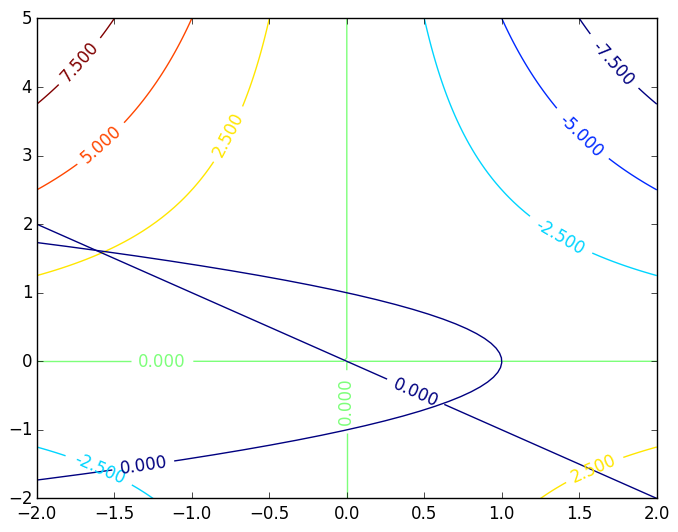

In [2]:
f(x) = -x[1]*x[2]
g1(x) = x[1] + x[2]^2 - 1
g2(x) = -x[1] - x[2]
xdom(-2,2)
ydom(-2,5)
contour(f)
contour(g1,0)
contour(g2,0);

In [3]:
function penaltyFunctionTrace(f, P, x0, r)
    T(x, r) = f(x) + r * P(x)
    x = x0
    trace = x
    for i = 1:length(r)
        result = optimize(x -> T(x, r[i]), x)
        #show(result)
        x = result.minimum
        trace = [trace x]
    end
    return trace
end

penaltyFunctionTrace (generic function with 1 method)

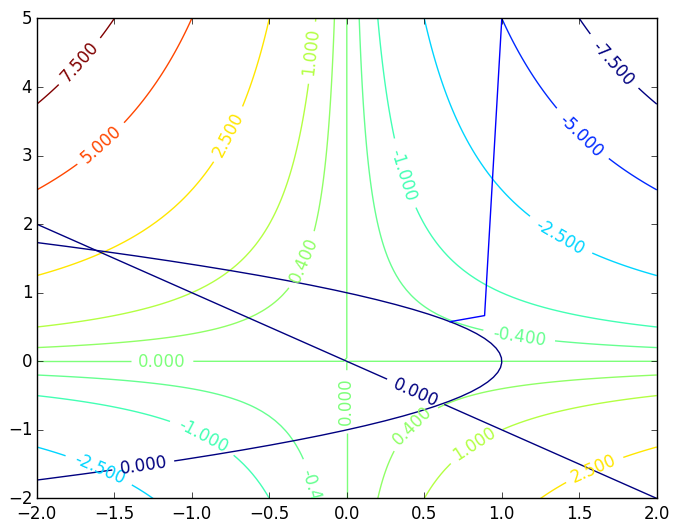

2x6 Array{Float64,2}:
 1.0  0.888919  0.686171  0.668634  0.66709   0.666935
 5.0  0.66665   0.585765  0.578148  0.577234  0.577142

In [4]:
P(x) = max(0, g1(x))^2 + max(0, g2(x))^2
trace = penaltyFunctionTrace(f, P, [1., 5.], [1, 10, 100, 1e3, 1e4])
contour(f, [-7.5, -5., -2.5, -1., -0.4, 0., 0.4, 1., 2.5, 5., 7.5])
contour(g1,0)
contour(g2,0)
plot(trace)
trace